<a href="https://colab.research.google.com/github/afrojaakter/Neural-Computing/blob/main/BoltzmannMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Boltzmann Machines

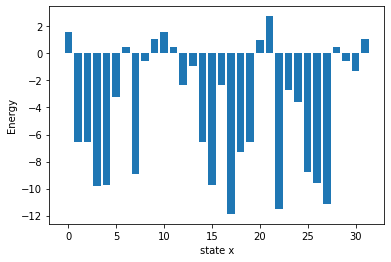

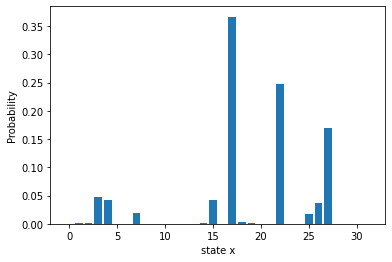

In [179]:
import numpy as np
import matplotlib.pyplot as plt

def energy(J, h, x):
  '''Returns energy vector
  J: symmetric coupling matrix
  h: bias vector
  x: multivaiate binary state {1, -1}
  '''
  n, m = J.shape
  Ei = 0
  for i in range(n):
    hx = h[i]*x[i]
    for j in range(m):
      Ei += -J[i, j]*x[i]*x[j] - hx
  return Ei

def Boltzmann_dist(E, X, T):
  '''
  E: energy
  x: binary state
  T: temperature
  z: partition function
  '''
  Qx = np.exp(-(1/T)*E)/z
  return Qx

def partition_fun(E, X, T):
  z = 0
  for x in X:
    z += np.exp(-(1/T)*E)
  return z

def prob_dist(E, z):
  '''returns the probability
  params::
  E: energy
  x: multivaiate binary state {1, -1}
  z: partition function
  '''
  return  np.exp(-E)/z

def de2bi(d, n):
    d = np.array(d)
    d = np.reshape(d, (1, -1))
    power = np.flipud(2**np.arange(n))

    g = np.zeros((np.shape(d)[1], n))
    for i, num in enumerate(d[0]):
        g[i] = num * np.ones((1,n))
    b = np.floor((g%(2*power))/power)
    return b
N = 5
X =  np.random.choice([-1,1], size = (N, 2**N))

J = (1/2**N)*np.dot(X, X.T)
h = N*np.random.randn(N)
T = 1

Energy_vec = []
for k in range(2**N):
  x = X[:, k]
  E = - np.dot(np.dot(x.T, J), x) - np.dot(x.T, h)
  Energy_vec.append(E)

Energy_vec = np.array(Energy_vec)
z = np.sum(np.exp(-Energy_vec))

prob_vec = []
for k in range(2**N):
  P = np.exp(-Energy_vec[k])/z
  prob_vec.append(P)

x_pos = np.arange(2**N)
plt.figure()
plt.bar(x_pos, Energy_vec)
plt.xlabel('state x')
plt.ylabel('Energy')
plt.show()

plt.figure()
plt.bar(x_pos, np.array(prob_vec))
plt.xlabel('state x')
plt.ylabel('Probability')
plt.show()

The above plots shows the energy and probability for Bolzmann distribution with N = 5 neurons. The lowest energy states have highest probability.

###Problem 2

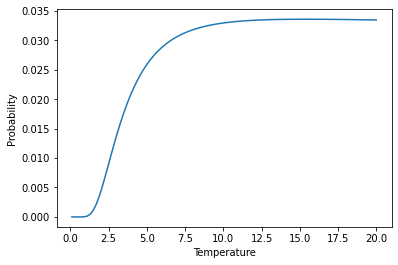

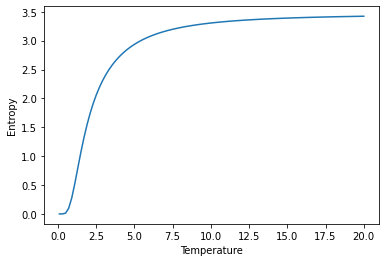

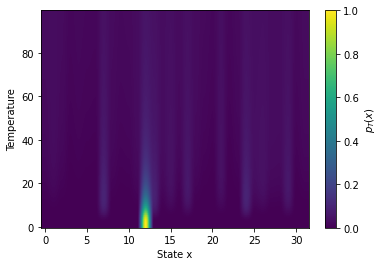

In [173]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
X =  np.random.choice([-1,1], size = (N, 2**N))
J = (1/2**N)*np.dot(X, X.T)
h = N*np.random.randn(N)
Temp = np.linspace(0.1, 20, 100)

entropy = []
probability = []
for T in Temp:
  Energy_vec = []
  for k in range(2**N):
    x = X[:, k]
    E = - np.dot(np.dot(x.T, J), x) - np.dot(x.T, h)
    Energy_vec.append(E)

  Energy_vec = np.array(Energy_vec)
  z = np.sum(np.exp(-Energy_vec/T))

  prob_vec = []
  for k in range(2**N):
    P = np.exp(-Energy_vec[k]/T)/z
    prob_vec.append(P)

  probability.append(prob_vec)
  entrop = - np.sum([p*np.log(p) for p in prob_vec])
  entropy.append(entrop)


plt.figure()
plt.plot(Temp, np.array(probability)[:, 1])
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.show()

plt.figure()
plt.plot(Temp, np.array(entropy))
plt.xlabel('Temperature')
plt.ylabel('Entropy')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
heatmap = ax.imshow(np.array(probability), vmin=0, vmax=1, origin = 'lower', aspect= 'auto')
ax.set_xlabel('State x')
ax.set_ylabel('Temperature')
cbar = fig.colorbar(heatmap) 
cbar.set_label('$p_T(x)$',size=10)
plt.show()

- Top Plot shows the probability distribution of a single state over temperature. As the temperature goes up the probability goes up and after a certain temperature level the probability growth slows down.
- The middle plot shows the entropy of the distribution P over temperature. With zero temperature the entropy is zero and all probability concentrates into lowest energy state. With the temperature rise, the entropy goes up until stochasticity affects coupling strenghts and all binary units fluctuates independently. 
- The bottom plot shows the probability distribution P, over a range of temperature T and diffirent states x. At low temperature, the distribution stays concentrated on the lowest-energy states. As the temperature rises, the ditribution becomes uniform over all states. 

###Problem 3: Sampling

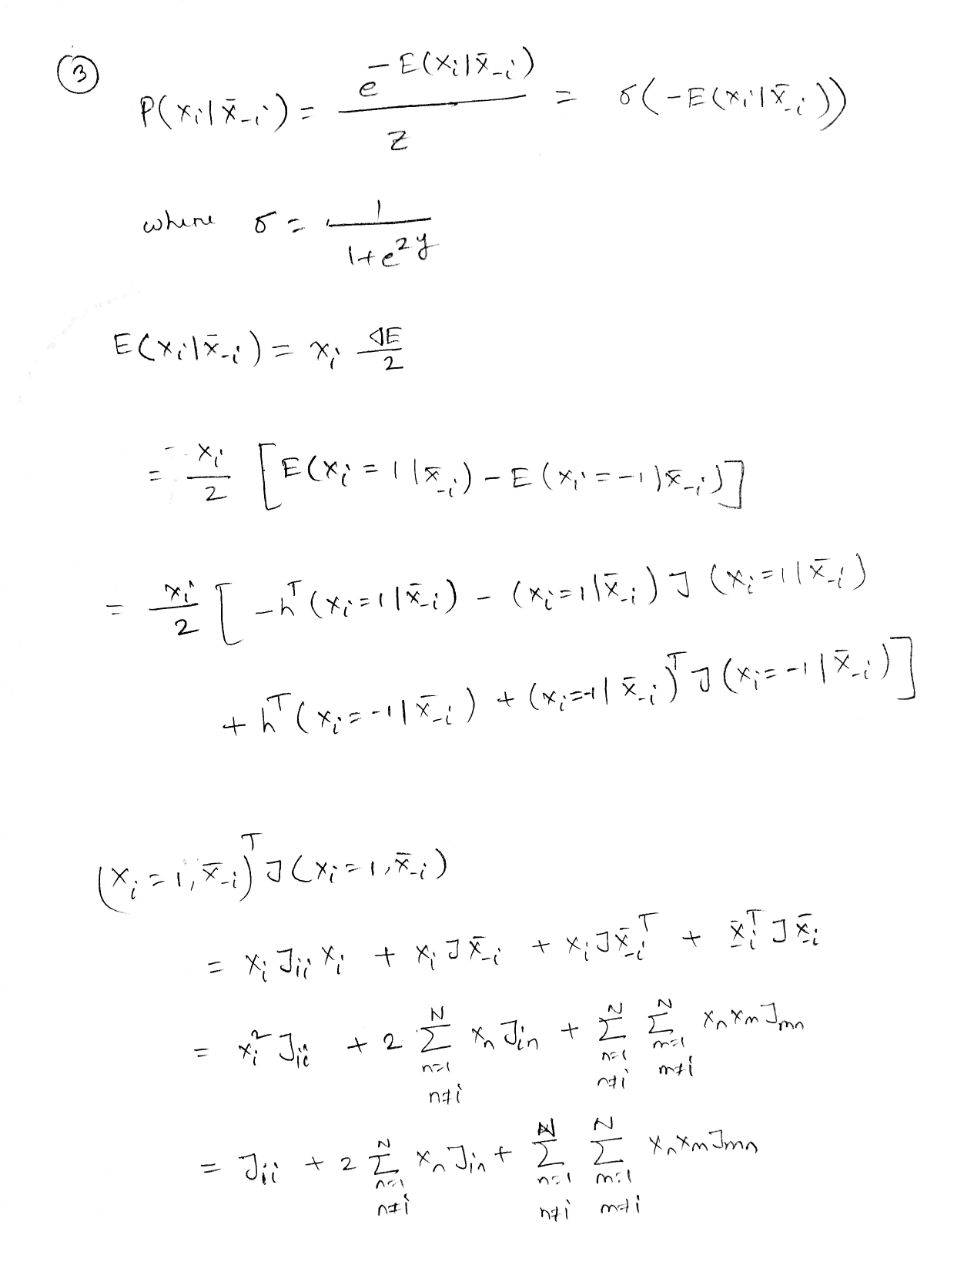

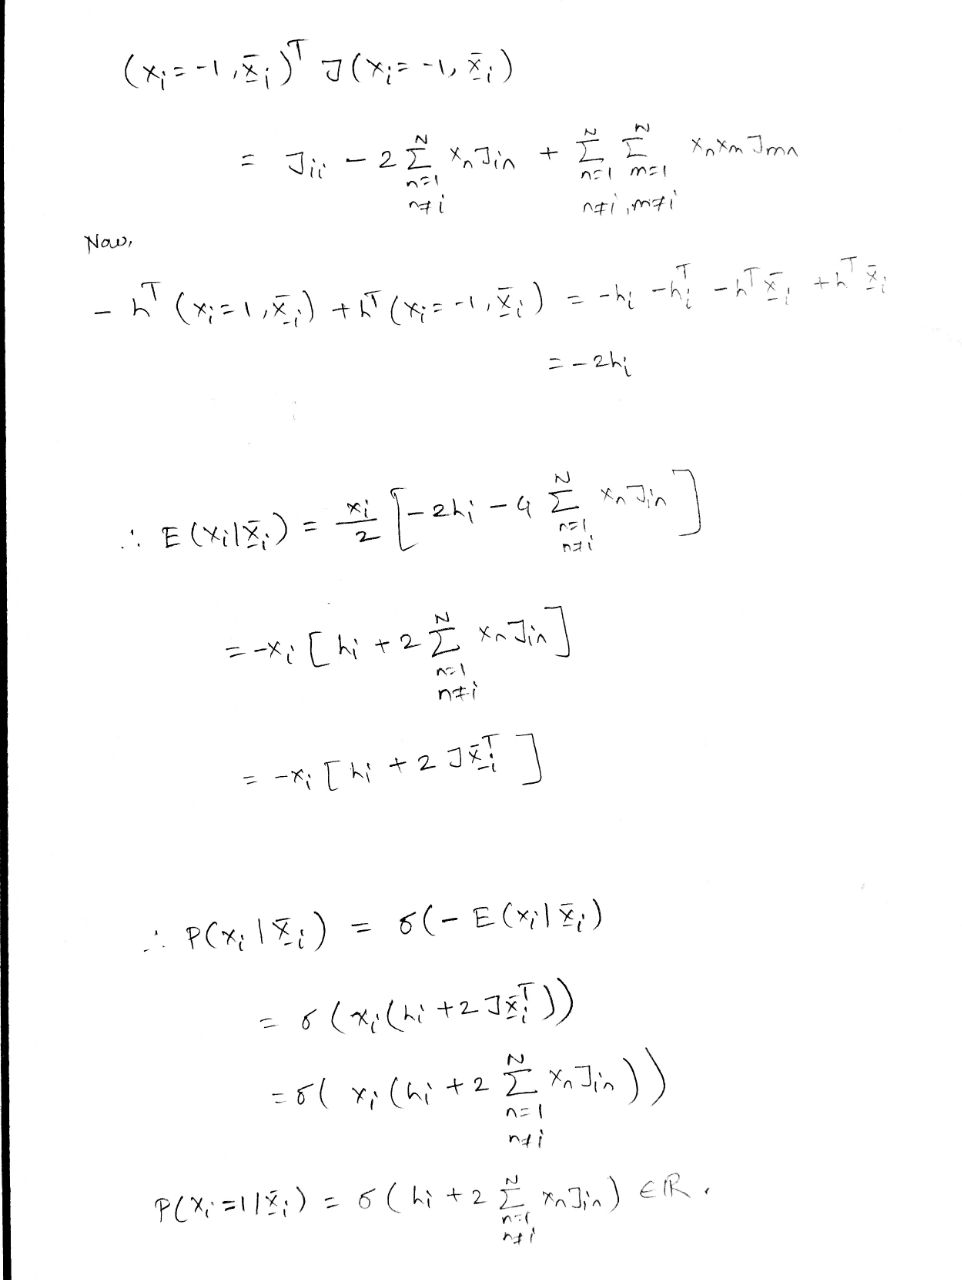

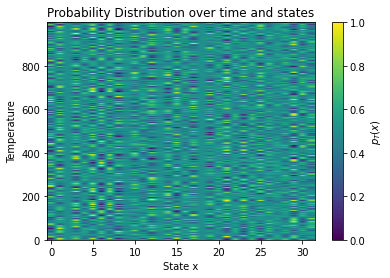

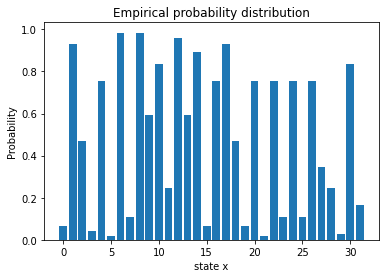

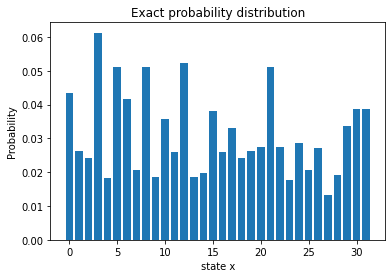

In [216]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
X =  np.random.choice([-1,1], size = (N, 2**N))
J = (1/2**N)*np.dot(X, X.T)
h = N*np.random.randn(N)
Temp = np.linspace(0.1, 20, 10**3)

def sigma(x):
  return 1/(1 + np.exp(2*x))

def conditional_dist(xi, x, J, h):
  '''
  returns conditional distribution of xi given x_i
  xi: a single binary number
  x_i: vector of all states except i-th component
  J: Symmetric metrix of order N x N
  h: bias vector of length N
  '''
  for i in range(N):
    Jx_i = 0
    for j in range(N):
      if j != i:
        Jx_i += x[j] * J[i, j]
    E = -xi * (h[i] + 2 * Jx_i)
  return sigma(-E)

probability = []
exact_probability = []
for T in Temp:
  Energy_vec = []
  for k in range(2**N):
    x = X[:, k]
    E = - np.dot(np.dot(x.T, J), x) - np.dot(x.T, h)
    Energy_vec.append(E)

  Energy_vec = np.array(Energy_vec)
  z = np.sum(np.exp(-Energy_vec/T))

  exact_prob_vec = []
  for k in range(2**N):
    P = np.exp(-Energy_vec[k]/T)/z
    exact_prob_vec.append(P)

  exact_probability.append(exact_prob_vec)

  prob_vec = []
  for k in range(2**N):
    x = X[:, k]
    if k == 0:
      x0 = np.random.choice([-1, 1], size = 1)[0]
      p = conditional_dist(x0, x, J, h)
    else: 
      xi = 2 * (np.random.rand() < p) - 1
      p = conditional_dist(xi, x, J, h)

    prob_vec.append(p)

  probability.append(prob_vec)

fig = plt.figure()
ax = fig.add_subplot()
heatmap = ax.imshow(np.array(probability), vmin=0, vmax=1, origin = 'lower', aspect= 'auto')
ax.set_xlabel('State x')
ax.set_ylabel('Temperature')
ax.set_title('Probability Distribution over time and states')
cbar = fig.colorbar(heatmap) 
cbar.set_label('$p_T(x)$',size=10)
plt.show()

x_pos = np.arange(2**N)
plt.figure()
plt.bar(x_pos, probability[-1])
plt.xlabel('state x')
plt.ylabel('Probability')
plt.title('Empirical probability distribution')
plt.show()

plt.figure()
plt.bar(x_pos, exact_probability[-1])
plt.xlabel('state x')
plt.ylabel('Probability')
plt.title('Exact probability distribution')
plt.show()

The top plot shows the probability distribution over temperature and different states x. The middle plot shows the empirical distribution and the bottom plot shows the exact probability distribution defined using equation (1). 

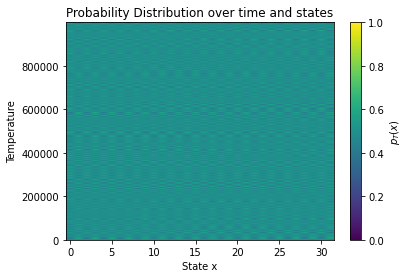

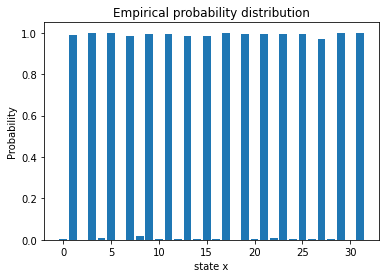

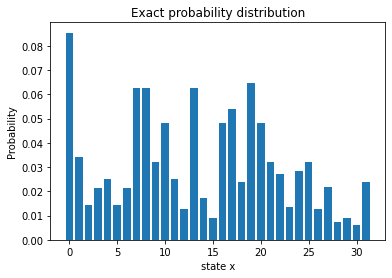

In [217]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
X =  np.random.choice([-1,1], size = (N, 2**N))
J = (1/2**N)*np.dot(X, X.T)
h = N*np.random.randn(N)
Temp = np.linspace(0.1, 20, 10**6)

def sigma(x):
  return 1/(1 + np.exp(2*x))

def conditional_dist(xi, x, J, h):
  '''
  returns conditional distribution of xi given x_i
  xi: a single binary number
  x_i: vector of all states except i-th component
  J: Symmetric metrix of order N x N
  h: bias vector of length N
  '''
  for i in range(N):
    Jx_i = 0
    for j in range(N):
      if j != i:
        Jx_i += x[j] * J[i, j]
    E = -xi * (h[i] + 2 * Jx_i)
  return sigma(-E)

probability = []
exact_probability = []
for T in Temp:
  Energy_vec = []
  for k in range(2**N):
    x = X[:, k]
    E = - np.dot(np.dot(x.T, J), x) - np.dot(x.T, h)
    Energy_vec.append(E)

  Energy_vec = np.array(Energy_vec)
  z = np.sum(np.exp(-Energy_vec/T))

  exact_prob_vec = []
  for k in range(2**N):
    P = np.exp(-Energy_vec[k]/T)/z
    exact_prob_vec.append(P)

  exact_probability.append(exact_prob_vec)

  prob_vec = []
  for k in range(2**N):
    x = X[:, k]
    if k == 0:
      x0 = np.random.choice([-1, 1], size = 1)[0]
      p = conditional_dist(x0, x, J, h)
    else: 
      xi = 2 * (np.random.rand() < p) - 1
      p = conditional_dist(xi, x, J, h)

    prob_vec.append(p)

  probability.append(prob_vec)

fig = plt.figure()
ax = fig.add_subplot()
heatmap = ax.imshow(np.array(probability), vmin=0, vmax=1, origin = 'lower', aspect= 'auto')
ax.set_xlabel('State x')
ax.set_ylabel('Temperature')
ax.set_title('Probability Distribution over time and states')
cbar = fig.colorbar(heatmap) 
cbar.set_label('$p_T(x)$',size=10)
plt.show()

x_pos = np.arange(2**N)
plt.figure()
plt.bar(x_pos, probability[-1])
plt.xlabel('state x')
plt.ylabel('Probability')
plt.title('Empirical probability distribution')
plt.show()

plt.figure()
plt.bar(x_pos, exact_probability[-1])
plt.xlabel('state x')
plt.ylabel('Probability')
plt.title('Exact probability distribution')
plt.show()

The above plots shows the prabability distribution with $10^6$ samples.

####Problem4: 


In [284]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
X1 =  np.random.choice([-1,1], size = (N, 2**N))
J1 = (1/N)*np.dot(X, X.T)
h1 = 10*np.random.randn(N)
T = 1

def sigma(x):
  return 1/(1 + np.exp(2*x))

def conditional_dist(xi, x, J, h):
  '''
  returns conditional distribution of xi given x_i
  xi: a single binary number
  x_i: vector of all states except i-th component
  J: Symmetric metrix of order N x N
  h: bias vector of length N
  '''
  for i in range(N):
    Jx_i = 0
    for j in range(N):
      if j != i:
        Jx_i += x[j] * J1[i, j]
    E = -xi * (h[i] + 2 * Jx_i)
  return sigma(-E)

def Dh_DJ():
  D_h = []
  D_J = []
  for i in range(N):
    x1 = X1[i,:]
    x = X[i,:]
    D_hi = np.mean(x1) -  np.mean(x)
    D_h.append(D_hi)

    for j in range(N):
      D_J_ij = np.mean(J1[i,:]*J1[:,j]) - np.mean(J[i,:]*J[:,j])
      D_J.append(D_J_ij)
  return D_h, D_J

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

max_iter = 5
for iter in range(max_iter):
  D_h, D_J = Dh_DJ()
  h1 = h - np.array(D_h)
  J1 = J - np.array(D_J).reshape(5,5)

  prob_vec1 = []
  for k in range(2**N):
    x1 = X1[:, k]
    if k == 0:
      x0 = np.random.choice([-1, 1], size = 1)[0]
      p1 = conditional_dist(x0, x, J1, h1)
    else: 
      xi = 2 * (np.random.rand() < p1) - 1
      p1 = conditional_dist(xi, x1, J1, h1)
    prob_vec.append(p1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [282]:
probability1 = []
exact_probability1 = []

Energy_vec1 = []
for k in range(2**N):
  x1 = X1[:, k]
  E1 = - np.dot(np.dot(x1.T, J1), x1) - np.dot(x1.T, h1)
  Energy_vec1.append(E1)

Energy_vec1 = np.array(Energy_vec1)
z1 = np.sum(np.exp(-Energy_vec1/T))

exact_prob_vec1 = []
for k in range(2**N):
  P1 = np.exp(-Energy_vec1[k]/T)/z1
  exact_prob_vec1.append(P1)

exact_probability1.append(exact_prob_vec1)

array([-2.32139239,  4.6210951 , -2.39119034, -2.41829926, -0.36936599])